In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
nltk.download('product_reviews_1')
nltk.download('product_reviews_2')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package product_reviews_1 to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package product_reviews_1 is already up-to-date!
[nltk_data] Downloading package product_reviews_2 to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package product_reviews_2 is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Data Extraction** 📊

In [3]:
nltk.corpus.product_reviews_1.fileids()

['Apex_AD2600_Progressive_scan_DVD player.txt',
 'Canon_G3.txt',
 'Creative_Labs_Nomad_Jukebox_Zen_Xtra_40GB.txt',
 'Nikon_coolpix_4300.txt',
 'Nokia_6610.txt',
 'README.txt']

**We will be using the dataset 'Nikon_coolpix_4300.txt' from the fileids above.**

**To extract text data from the file, there are multiple ways**

  - `reviews` function extracts the reviews in an object form.
  - `raw` function extracts the raw data from the text file.
  - `sents` function extract tokenised list of all sentences in all the reviews.


In [4]:
reviews= nltk.corpus.product_reviews_1.reviews(fileids='Nikon_coolpix_4300.txt')
print(reviews)

[Review(title="the best 4mp compact digital available", review_lines=[ReviewLine(features=[('camera', '+2')], notes=[], sent=['this', 'camera', 'is', 'perfect', 'for', 'an', 'enthusiastic', 'amateur', 'photographer', '.']), ReviewLine(features=[('picture', '+3'), ('macro', '+3')], notes=[], sent=['the', 'pictures', 'are', 'razor', '-', 'sharp', ',', 'even', 'in', 'macro', '.']), ReviewLine(features=[('size', '+2')], notes=['u'], sent=['it', 'is', 'small', 'enough', 'to', 'fit', 'easily', 'in', 'a', 'coat', 'pocket', 'or', 'purse', '.']), ReviewLine(features=[('weight', '+1')], notes=['u'], sent=['it', 'is', 'light', 'enough', 'to', 'carry', 'around', 'all', 'day', 'without', 'bother', '.']), ReviewLine(features=[('feature', '+2')], notes=['u'], sent=['operating', 'its', 'many', 'features', 'is', 'easy', 'and', 'often', 'obvious', '-', 'i', "'", 'm', 'no', 'annie', 'lebovitz', ',', 'but', 'i', 'was', 'able', 'to', 'figure', 'out', 'most', 'of', 'its', 'abilities', 'just', 'messing', 'ar

In [5]:
raw_text=nltk.corpus.product_reviews_1.raw(fileids='Nikon_coolpix_4300.txt')
print(raw_text)

*****************************************************************************
* Annotated by: Minqing Hu and Bing Liu, 2004.              
*		Department of Computer Sicence
*               University of Illinois at Chicago              
*
* Product name: Nikon coolpix 4300
* Review Source: amazon.com
*
* See Readme.txt to find the meaning of each symbol. 
*****************************************************************************

[t]the best 4mp compact digital available  
camera[+2]##this camera is perfect for an enthusiastic amateur photographer . 
picture[+3], macro[+3]##the pictures are razor-sharp , even in macro . 
size[+2][u]##it is small enough to fit easily in a coat pocket or purse . 
weight[+1][u]##it is light enough to carry around all day without bother . 
feature[+2][u]##operating its many features is easy and often obvious - i 'm no annie lebovitz , but i was able to figure out most of its abilities just messing around with it at a camera store . 
manual[+2]##the manu

In [6]:
review_sentence=nltk.corpus.product_reviews_1.sents(fileids='Nikon_coolpix_4300.txt')
print(review_sentence)

[['this', 'camera', 'is', 'perfect', 'for', 'an', 'enthusiastic', 'amateur', 'photographer', '.'], ['the', 'pictures', 'are', 'razor', '-', 'sharp', ',', 'even', 'in', 'macro', '.'], ...]


# Data Exploration

Let's start with simple exploration to check

* The total number of reviews,
* Total number of review sentences,
* Title for each review, and
* Extract complete review texts

In [7]:
print(f"Total no. of review available : {len(reviews)}")

Total no. of review available : 34


In [8]:
print(f"Total review sentences : {len(review_sentence)}")

Total review sentences : 346


In [9]:
review_titles = {f"rev_{i+1}" : reviews[i].title for i in range(len(reviews))}
for tit in review_titles.keys():
    print(f"{tit} : {review_titles[tit]}")

rev_1 : the best 4mp compact digital available
rev_2 : perfect to grow into
rev_3 : near perfection
rev_4 : not too excited
rev_5 : only " cons " here
rev_6 : bad service
rev_7 : system error
rev_8 : amazing camera
rev_9 : super camera
rev_10 : camera shake
rev_11 : great camera
rev_12 : excellent camera
rev_13 : the ricksters review
rev_14 : super little camera
rev_15 : beginner looks experienced with coolpix
rev_16 : can i have a few more stars please
rev_17 : great camera
rev_18 : great camera for a great price
rev_19 : not disappointed
rev_20 : field tested
rev_21 : it do n't get better
rev_22 : excellent compact digital camera
rev_23 : you will not be sorry
rev_24 : absolutely great point and shoot camera
rev_25 : great camera
rev_26 : best 4-mp camera of its size and price range
rev_27 : great camera
rev_28 : digital nirvana
rev_29 : i love this baby
rev_30 : it 's so cool
rev_31 : excellent little camera
rev_32 : perfect consumer digital camera
rev_33 : small camera
rev_34 : nik

In [10]:
review_texts = []
for i in range(len(reviews)):
    review_lines = reviews[i].review_lines
    line = ''
    for j in range(len(review_lines)):
        line += ' '.join(review_lines[j].sent)
    review_texts.append(line)

In [11]:
print("Complete Review Texts".center(150))
i = 1
for rev in review_texts:
    print(f"Title --> {review_titles[f'rev_{i}']} :\n\n{rev}\n")
    print(f"Summary --> \nLen of review : {len(rev.split())} words.\n")
    i += 1

                                                                Complete Review Texts                                                                 
Title --> the best 4mp compact digital available :

this camera is perfect for an enthusiastic amateur photographer .the pictures are razor - sharp , even in macro .it is small enough to fit easily in a coat pocket or purse .it is light enough to carry around all day without bother .operating its many features is easy and often obvious - i ' m no annie lebovitz , but i was able to figure out most of its abilities just messing around with it at a camera store .the manual does a fine job filling in any blanks that remain .the auto - focus performs well , but i love having the 12 optional scene modes - they are dummy - proof , and correspond to many situations in which i would actually seek to use the camera .comes with a 16 mb compact flash and one rechargable battery the charging unit , included , is fast and small .i bought a 256 mb cf a

**Words per review**

In [12]:
words_per_review = [len(rev) for rev in review_texts]

In [13]:
print(f"Largest review: {max(words_per_review)}")
print(f"Smallest review: {min(words_per_review)}")
print(f"Average words per review: {sum(words_per_review)/ len(words_per_review):.0f}")

Largest review: 2953
Smallest review: 85
Average words per review: 935


**Average sentence length analysis**

In [14]:
sent_length = [len(rev) for rev in review_sentence]

In [15]:
print(f"Largest sentence: {max(sent_length)}")
print(f"Smallest sentence: {min(sent_length)}")
print(f"Average sentence length: {sum(sent_length)/ len(sent_length):.0f}")

Largest sentence: 66
Smallest sentence: 3
Average sentence length: 19


**Review title analysis**

In [16]:
titles = ' '.join(list(review_titles.values()))

In [17]:
# tokenization
tokens = nltk.word_tokenize(titles)

# Word frequency distribution


* Analyze the word frequency using the Freq_dist function of nltk.
* This accounts for frequency of each word in the text being analyzed.
* Create a dataframe for ease of analysis.

In [18]:
freq_dist = pd.DataFrame({"words" : nltk.FreqDist(tokens).keys(), "freq" : nltk.FreqDist(tokens).values()})
freq_dist.sort_values('freq',ascending=False, inplace = True, ignore_index=True)
freq_dist.freq.sum()

121

In [19]:
freq_dist.head(10)

,words,freq
0,camera,16
1,great,7
2,digital,4
3,it,3
4,excellent,3
5,not,3
6,the,2
7,``,2
8,and,2
9,price,2


# Stopword analysis

**Clean the data further to remove the frequently occurring stopwords.**

In [20]:
stp_words = nltk.corpus.stopwords.words('english')

In [21]:
stp_wrd_freq_dist = freq_dist[freq_dist.words.isin(stp_words)].reset_index(drop = True)
stp_wrd_freq_dist[:10]

,words,freq
0,it,3
1,not,3
2,the,2
3,and,2
4,i,2
5,a,2
6,only,1
7,do,1
8,you,1
9,will,1


# Use a bar chart to analyze the most frequent words in the text.

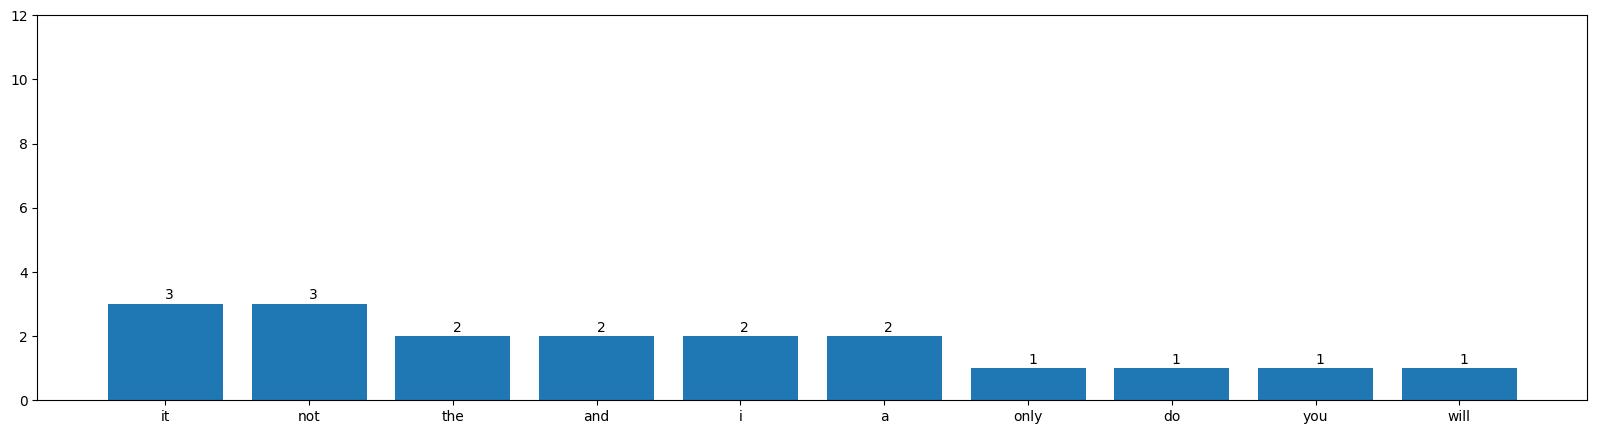

In [22]:
plt.figure(figsize = (20,5))
plt.bar(x = stp_wrd_freq_dist.words[:10], height=stp_wrd_freq_dist.freq[:10])
for i in range(10):
    plt.annotate(f"{stp_wrd_freq_dist.freq[i]}",xy = (i, stp_wrd_freq_dist.freq[i]+0.15) )
plt.ylim(0,12)
plt.show()

**Perform a granular analysis exploring the top 20 words by frequency.**

In [23]:
top_20_words = freq_dist[~(freq_dist.words.isin(stp_words))].reset_index(drop = True)
top_20_words.head(10)

,words,freq
0,camera,16
1,great,7
2,digital,4
3,excellent,3
4,``,2
5,price,2
6,best,2
7,little,2
8,super,2
9,compact,2


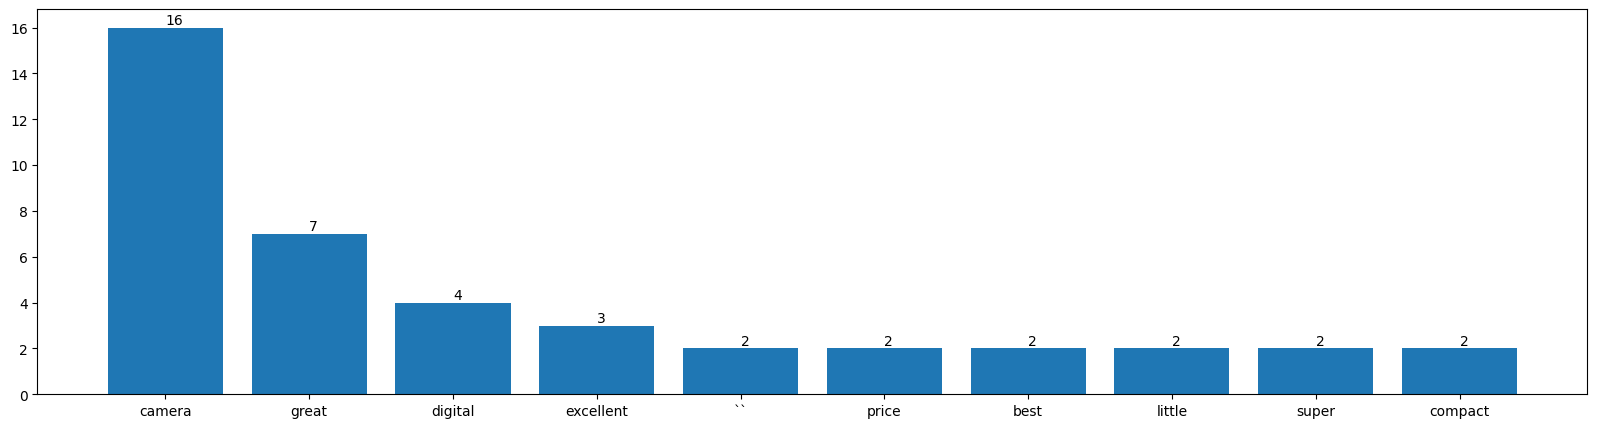

In [24]:
plt.figure(figsize = (20,5))
plt.bar(x = top_20_words.words[:10], height=top_20_words.freq[:10])
for i in range(10):
    plt.annotate(f"{top_20_words.freq[i]}",xy = (i, top_20_words.freq[i]+0.15) )
# plt.ylim(0,12)
plt.show()

* Looking at the plot it seems terms like camera which are terms identical to product name are present in abundance.
* Also the character '' needs to be dropped too
* However they are not contributing much to analysis, hence these may be removed from the data.

In [25]:
word_list = ['camera', '\"']
most_list = top_20_words[~(top_20_words.words.isin(word_list))]
most_list.head(10)

,words,freq
1,great,7
2,digital,4
3,excellent,3
4,``,2
5,price,2
6,best,2
7,little,2
8,super,2
9,compact,2
10,perfect,2
